In [1]:
import numpy as np
import pandas as pd
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt
import re
from utils import *

pd.set_option('future.no_silent_downcasting', True)

In [2]:
path_data = Path("../data")

In [3]:
all_data = pd.read_pickle(path_data / "analysis_with_nan.pickle")
tractor_data = pd.read_pickle(path_data / "operator_with_nan.pickle")

In [4]:
all_data.sample(3)

Полож.пед.акселер.,%  Давл.масла двиг.,кПа  Обор.двиг.,об/мин  \
1683879                   0.0                 460.0            1851.25   
3322197                   0.0                 548.0            1907.00   
685097                    0.0                 148.0             701.00   

         КПП. Давление масла в системе смазки  Скорость  ДВС. Давление смазки  \
1683879                                1248.0      12.1                 460.0   
3322197                                1216.0       0.0                 548.0   
685097                                 1072.0       0.0                 148.0   

         ДВС. Температура охлаждающей жидкости  \
1683879                                   75.0   
3322197                                   71.0   
685097                                    79.0   

         Давление в пневмостистеме (spn46), кПа  Электросистема. Напряжение  \
1683879                                   728.0                       27.75   
3322197                                   768.0                         NaN   
685097                                    816.0                       28.20   

         ДВС. Частота вращения коленчатого вала        Дата и время  target  
1683879                                 1851.25 2023-07-16 21:08:21       2  
3322197                                 1907.00 2023-08-23 00:33:49       2  
685097                                   701.00 2023-06-08 22:15:35       0

In [5]:
tractor_data.sample(3)

Полож.пед.акселер.,%  Давл.масла двиг.,кПа  Обор.двиг.,об/мин  \
1260795                   0.0                 520.0           1872.000   
2733188                   0.0                 448.0           1587.875   
634390                    0.0                 500.0           1916.250   

         КПП. Давление масла в системе смазки  Скорость  ДВС. Давление смазки  \
1260795                                1184.0      10.1                 520.0   
2733188                                1200.0       0.0                 448.0   
634390                                 1280.0       NaN                 500.0   

         ДВС. Температура охлаждающей жидкости  \
1260795                                   76.0   
2733188                                   82.0   
634390                                    71.0   

         Давление в пневмостистеме (spn46), кПа  Электросистема. Напряжение  \
1260795                                   776.0                       27.55   
2733188                                   768.0                       27.70   
634390                                    824.0                       27.70   

         ДВС. Частота вращения коленчатого вала        Дата и время  \
1260795                                1872.000 2023-07-26 01:08:01   
2733188                                1587.875 2023-06-01 11:22:33   
634390                                 1916.250 2023-07-17 00:53:14   

        tractor_type  
1260795        С2586  
2733188     023Т0719  
634390         С0790

In [6]:
all_data.nunique()

Полож.пед.акселер.,%                          298
Давл.масла двиг.,кПа                         1501
Обор.двиг.,об/мин                           15532
КПП. Давление масла в системе смазки         3001
Скорость                                      597
ДВС. Давление смазки                         1601
ДВС. Температура охлаждающей жидкости         151
Давление в пневмостистеме (spn46), кПа        979
Электросистема. Напряжение                    258
ДВС. Частота вращения коленчатого вала      15579
Дата и время                              2522344
target                                          3
dtype: int64

In [7]:
tractor_data.nunique()

Полож.пед.акселер.,%                          251
Давл.масла двиг.,кПа                          177
Обор.двиг.,об/мин                           12268
КПП. Давление масла в системе смазки           88
Скорость                                      595
ДВС. Давление смазки                          177
ДВС. Температура охлаждающей жидкости         108
Давление в пневмостистеме (spn46), кПа         84
Электросистема. Напряжение                    240
ДВС. Частота вращения коленчатого вала      12322
Дата и время                              2358528
tractor_type                                   14
dtype: int64

In [8]:
tractor_data.shape, all_data.shape

((2666861, 12), (2856565, 12))

In [9]:
all_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
target                                         0
dtype: int64

In [10]:
tractor_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
tractor_type                                   0
dtype: int64

In [11]:
all_data.drop_duplicates(inplace=True, ignore_index=True)
tractor_data.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
tractor_data.shape, all_data.shape

((2623314, 12), (2813018, 12))

In [13]:
data = pd.merge(all_data,
    tractor_data, 
    on=['Полож.пед.акселер.,%', 'Давл.масла двиг.,кПа', 'Обор.двиг.,об/мин',
        'КПП. Давление масла в системе смазки', 'Скорость',
        'ДВС. Давление смазки', 'ДВС. Температура охлаждающей жидкости',
        'Давление в пневмостистеме (spn46), кПа', 'Электросистема. Напряжение',
        'ДВС. Частота вращения коленчатого вала', 'Дата и время'],
    how="inner")

In [14]:
data.bfill(inplace=True)
data.ffill(inplace=True)

In [15]:
data["target"].unique()

array([0, 2])

In [16]:
data.shape

(2623314, 13)

In [17]:
data.sample(3)

Полож.пед.акселер.,%  Давл.масла двиг.,кПа  Обор.двиг.,об/мин  \
814119                    0.0                 500.0           1907.000   
1553545                  94.8                 460.0           1914.750   
1739240                   0.0                 160.0            650.375   

         КПП. Давление масла в системе смазки  Скорость  ДВС. Давление смазки  \
814119                                 1296.0       0.0                 500.0   
1553545                                1264.0      10.4                 460.0   
1739240                                1200.0       0.0                 160.0   

         ДВС. Температура охлаждающей жидкости  \
814119                                    72.0   
1553545                                   76.0   
1739240                                   68.0   

         Давление в пневмостистеме (spn46), кПа  Электросистема. Напряжение  \
814119                                    784.0                       28.15   
1553545                                   768.0                       28.05   
1739240                                   760.0                       27.50   

         ДВС. Частота вращения коленчатого вала        Дата и время  target  \
814119                                 1907.000 2023-07-31 17:59:05       2   
1553545                                1914.750 2023-06-24 12:14:01       2   
1739240                                 650.375 2023-09-30 00:54:39       2   

        tractor_type  
814119         С0790  
1553545        С1067  
1739240        С1178

In [18]:
data.sort_values(["tractor_type", "target", "Дата и время"], ignore_index=True, axis=0, inplace=True)

In [19]:
data["tractor_type"].unique()

array(['022C4097', '023T0569', '023Т0049', '023Т0255', '023Т0719',
       'C1969', 'Р3106', 'С0790', 'С0873', 'С1067', 'С1178', 'С2177',
       'С2586', 'С2627 7226ом61'], dtype=object)

In [20]:
for tractor in data["tractor_type"].unique():
    print(data[data["tractor_type"] == tractor]["target"].unique())

[0]
[0]
[0]
[2]
[0]
[0]
[2]
[2]
[2]
[2]
[2]
[0]
[2]
[0]


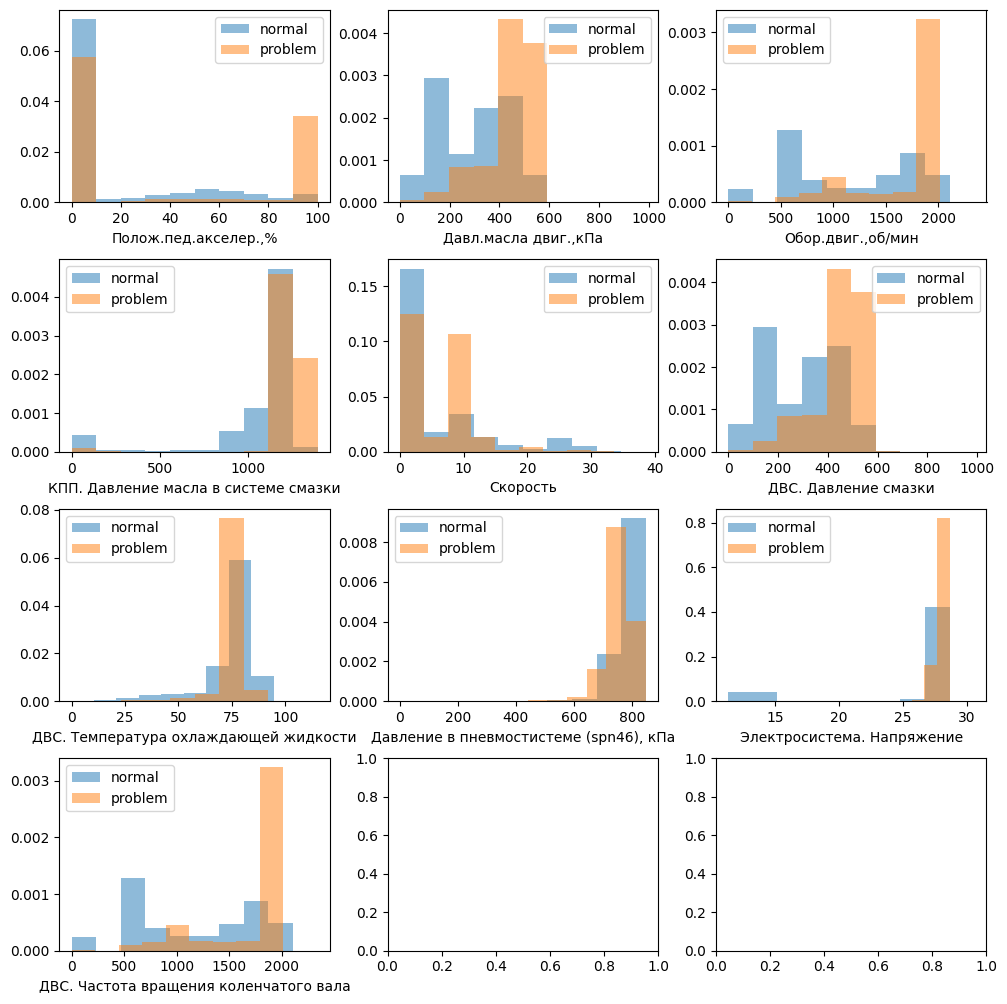

In [62]:
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout(h_pad=2)

for i, num_col in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    df_target_0 = data.loc[data["target"] == 0, num_col]
    df_target_2 = data.loc[data["target"] == 2, num_col]
    axis[row][col].hist(df_target_0, alpha=0.5, label="normal", density=True)
    axis[row][col].hist(df_target_2, alpha=0.5, label='problem', density=True)
    axis[row][col].legend()
    axis[row][col].set_xlabel(num_col)

In [21]:
data.sort_values("Дата и время", inplace=True, ignore_index=True)

In [22]:
data["Дата и время"].nunique() ,data.shape

(2358528, (2623314, 13))